In [2]:
import matplotlib.pyplot as plt
from ipywidgets import widgets
import numpy as np
from scipy.optimize import fsolve

In [3]:
ke = 0.00175  # 0.025
temp_env = 22
time_step = 0.5
euler_step = 0.01

In [4]:
def f(temp):
    return -ke * (temp - temp_env)

In [5]:
def euler(h, x, x_t, y):
    while x < x_t:
        y += h * f(y)
        x += h
    return x, y

In [6]:
def interactive(temp_env_, temp_initial, time_max):
    global temp_env
    temp_env = temp_env_

    milk_time = [1, 100, 200]
    milk_temp = 0
    milk_mass = 50
    coffee_mass = 200

    for mt in milk_time[-1::-1]:
        time = [i * time_step for i in range(int(time_max / time_step))]
        temp = [temp_initial]

        for i in range(len(time) - 1):
            if time[i] == mt:  # добавили молоко
                temp[i] = (temp[i] * coffee_mass + milk_temp * milk_mass) / (milk_mass + coffee_mass)
                # temp[i] -= 10
            result = euler(euler_step, time[i], time[i + 1], temp[i])
            temp.append(result[1])
        
        plt.plot(time, temp)
    plt.xlabel('Время (с)')
    plt.ylabel('Тмемпература (°C)')
    plt.xlim(-5, time_max + 5)
    plt.ylim(-5, 105)
    plt.grid()
    plt.show()

In [7]:
widgets.interact(interactive,
                 temp_env_ = widgets.IntSlider(value=22, min=0, max=35, description='Темп. окруж.'),
                 temp_initial = widgets.IntSlider(value=83, min=80, max=100, description='Темп. кофе'),
                 time_max = widgets.IntSlider(value=500, min=30, max=600, step=5, description='Время'))

interactive(children=(IntSlider(value=22, description='Темп. окруж.', max=35), IntSlider(value=83, description…

<function __main__.interactive(temp_env_, temp_initial, time_max)>

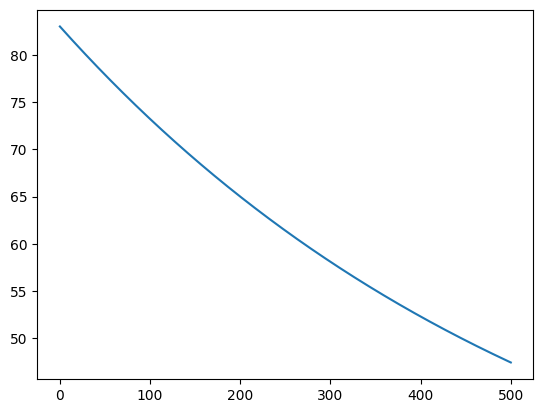

In [26]:
def backward_euler(h, x, y):
    y_next = fsolve(lambda y_next: y_next - h * f(y_next) - y, y)
    return y_next

temp_initial = np.array([83])

time_step = 0.5
time = np.linspace(0, 500, num=1001)

temp = np.empty((len(time), len(temp_initial)))
temp[0] = temp_initial


for i in range(1, len(time)):
    temp[i] = backward_euler(time_step, time[i-1], temp[i-1, :])

plt.plot(time, temp)